In [1]:
from delaunay import *
from visualizer.main import Visualizer
from random import uniform
from typing import List

In [2]:

def gen_points(n : int) -> List[Point]:
    list = []
    for i in range(n):
        list.append(Point(uniform(0,100),uniform(0,100)))
    return list

def make_subscritable_points(list):
    list2 = []
    for point in list:
        list2.append((point.x,point.y))
    return list2

def visualise_tri(tri : DelaunayTriangulation):
    vis = Visualizer()
    edges = []
    for edge in list(tri.neighbours.edges.keys()):
        edges.append((edge.p1.get(),edge.p2.get()))
    vis.add_line_segment(edges)
    return vis

In [3]:
#Editable
points = gen_points(10) #Wybierz ilość generowanych punktów

Wizualizacja punktów

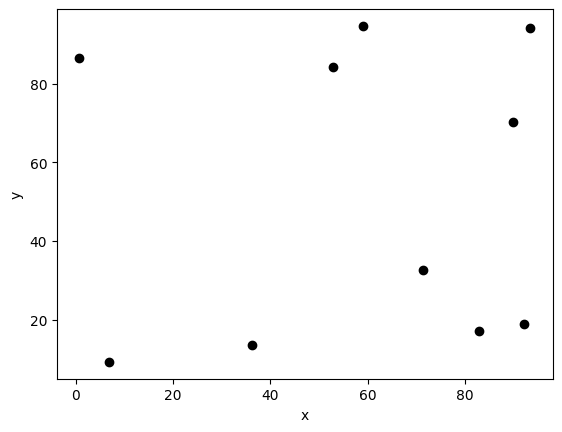

In [4]:
vis = Visualizer()
vis.add_point(make_subscritable_points(points),color="black")
vis.show()

Inicjacja triangulacji, wizualizacja stanu początkowego

In [5]:
def initialize(points):
    tri = DelaunayTriangulation(points)
    return tri, points

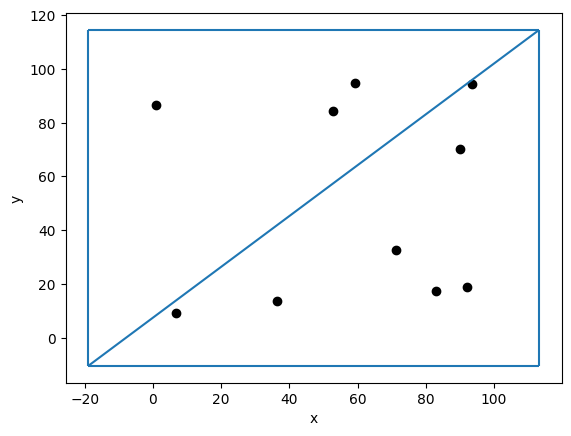

In [6]:
tri, points = initialize(points)
vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points),color="black")
vis.show()

Wizualizacja częsciowego stanu triangulacji.
Parametr n - ilość zakończonych iteracji (dodanych punktów)

In [7]:
def partial(points, n):
    if n == len(points): raise Exception("Pełna triangulacja, funkcje nie będą działać")
    if n > len(points): raise Exception("Nie ma tyle punktów")
    tri = DelaunayTriangulation(points)
    for i in range(n):
        curr = tri.find_triangle(points[i])
        neighbourhood, hull, _ = tri.find_neighbourhood(points[i],curr,set(),neighbourhood=[], hull=[])
        tri.delete_neighbourhood(neighbourhood)
        tri.rebuild_neighbourhood(points[i], hull)
        
    return tri, points

In [8]:
def partialvis(points,n):
    tri, points = partial(points, n)
    vis = visualise_tri(tri)
    vis.add_point(make_subscritable_points(points),color="black")
    vis.add_point(points[n+1].get(),color="red")
    vis.show()

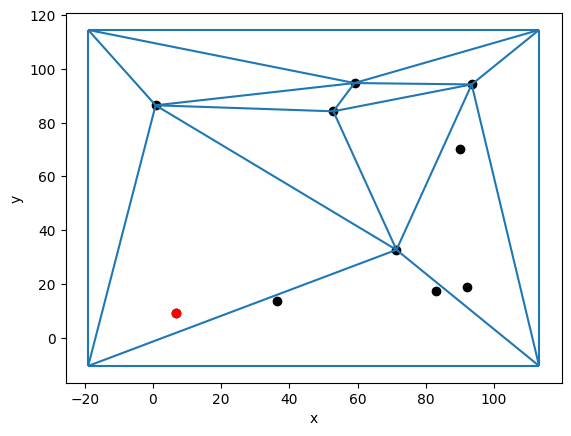

In [9]:
#Editable
partialvis(points,n=5) #Można podmienić wartość paramentru n na inną liczbę

Sąsiedztwo: znalezienie sąsiedztwa n-tego punktu. 

In [10]:
def fneighbourhood(points,n):
    tri, points = partial(points, n)
    vis = visualise_tri(tri)
    vis.add_point(make_subscritable_points(points),color="black")
    curr = tri.find_triangle(points[n+1])
    neighbourhood, hull, _ = tri.find_neighbourhood(points[n+1],curr,set(),neighbourhood=[],hull=[])
    for triangle in neighbourhood:
        for edge in triangle.edges:
            vis.add_line_segment((edge.p1.get(),edge.p2.get()), color="red")
    vis.add_point(points[n+1].get(),color="red")
    vis.show()

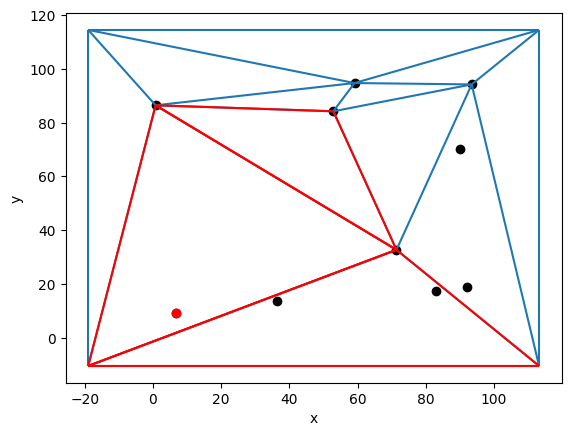

In [11]:
#Editable
fneighbourhood(points,n=5) #Można podmienić wartość paramentru n na inną liczbę


Sąsiedztwo: znalezienie otoczki sąsiedztwa n-tego punktu

In [12]:
def showhull(points,n):
    tri, points = partial(points, n)
    vis = visualise_tri(tri)
    vis.add_point(make_subscritable_points(points),color="black")
    curr = tri.find_triangle(points[n+1])
    neighbourhood, hull, _ = tri.find_neighbourhood(points[n+1],curr,set(),neighbourhood=[],hull=[])
    for edge in hull:
        vis.add_line_segment((edge.p1.get(),edge.p2.get()), color="purple")
    vis.add_point(points[n+1].get(),color="red")
    vis.show()


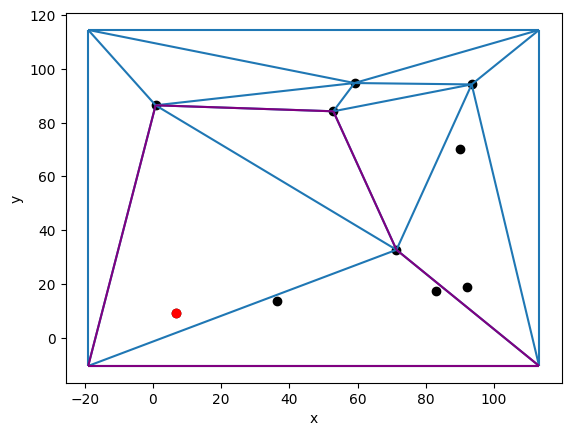

In [13]:
#Editable
showhull(points,n=5) #Można podmienić wartość paramentru n na inną liczbę

Wizualizacja usuniętego sąsiedztwa n-tego punktu

In [14]:
def show_deleted_hull(points,n):
    tri, points = partial(points, n)
    curr = tri.find_triangle(points[n+1])
    neighbourhood, hull, _ = tri.find_neighbourhood(points[n+1],curr,set(),neighbourhood=[],hull=[])
    tri.delete_neighbourhood(neighbourhood)
    vis = visualise_tri(tri)
    vis.add_point(make_subscritable_points(points),color="black")
    vis.add_point(points[n+1].get(),color="red")

    vis.show()


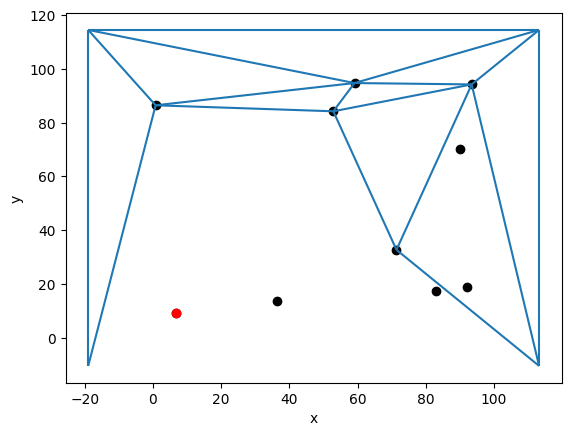

In [15]:
#Editable
show_deleted_hull(points,n=5) #Można podmienić parametr n na inną wartość

Wizualizacja odbudowanego sąsiedztwa n-tego punktu

In [16]:
def rebuilt(points,n):
    tri, points = partial(points, n)
    curr = tri.find_triangle(points[n+1])
    neighbourhood, hull, _ = tri.find_neighbourhood(points[n+1],curr,set(),neighbourhood=[],hull=[])
    tri.delete_neighbourhood(neighbourhood)
    tri.rebuild_neighbourhood(points[6],hull)
    vis = visualise_tri(tri)
    vis.add_point(make_subscritable_points(points),color="black")
    vis.add_point(points[n+1].get(),color="red")
    vis.show()


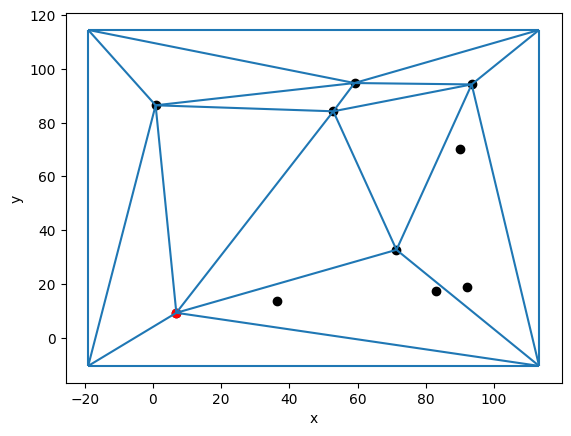

In [17]:
#Editable
rebuilt(points,n=5) #Można podmienić wartość paramentru n na inną liczbę

Wizualizacja pełnej triangulacji wszystkich punktów

In [18]:
def main_test(points, clean_up):
    tri = DelaunayTriangulation(points)
    for i in range(len(points)):
        curr = tri.find_triangle(points[i])
        neighbourhood, hull, _ = tri.find_neighbourhood(points[i],curr,set(),neighbourhood=[], hull=[])
        tri.delete_neighbourhood(neighbourhood)
        tri.rebuild_neighbourhood(points[i], hull)
    if clean_up: tri.clean_up()  
    return tri, points

In [19]:
def final(points,clean_up : bool = False):
    tri, points = main_test(points,clean_up)
    vis = visualise_tri(tri)
    vis.add_point(make_subscritable_points(points))
    vis.show()
    

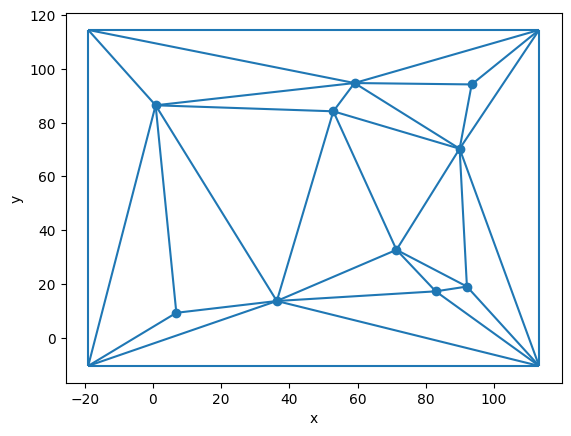

In [20]:
#Editable
final(points,clean_up=False) #Można zmienić wartość paramentru clean_up na True i zobaczyć efekt usunięcia pomocniczych trójkątów